In [7]:
import os

import numpy as np
import matplotlib.pyplot as plt
from tensordict import TensorDict

In [2]:
from world_machine_experiments import  shared
from world_machine_experiments.toy1d import base
from hamilton import driver


d = driver.Builder().with_modules(base, shared).build()

inputs = {"sequence_length": 1000,
            "n_sequence": 10000,
            "context_size": 200,
            "batch_size": 32,
            "state_dimensions": [0],
            "state_control": "periodic",
            "seed":[0,42],
        }

outputs = d.execute(["toy1d_dataloaders"], inputs=inputs)

In [3]:
train_loader = outputs["toy1d_dataloaders"]["train"]

In [4]:
experiment_path = r"C:\Users\eltsu\Documentos\Projetos\WorldMachine\resultados\toy1d_experiment2_best_long"

In [8]:
logits_path = r"C:\Users\eltsu\Documentos\Projetos\WorldMachine\resultados\toy1d_experiment2_best_long\CosineAnnealingWithWarmup\run_0\metrics_logits"

In [9]:

samples = {}
for name in ["normal", "use_state", "prediction_local", "prediction", "prediction_shallow", "targets"]:
    path = os.path.join(logits_path, name)
    samples[name] = TensorDict.load(path)



In [14]:
samples["targets"]["state_decoded"][0,:,0]

MemoryMappedTensor([ 9.8147e-01,  9.8134e-01,  9.8125e-01,  9.8125e-01,
                     9.8134e-01,  9.8156e-01,  9.8193e-01,  9.8248e-01,
                     9.8323e-01,  9.8421e-01,  9.8542e-01,  9.8683e-01,
                     9.8841e-01,  9.9014e-01,  9.9198e-01,  9.9391e-01,
                     9.9591e-01,  9.9795e-01,  1.0000e+00,  6.7542e-01,
                     6.7742e-01,  6.7968e-01,  6.8218e-01,  6.8488e-01,
                     6.8777e-01,  6.9081e-01,  6.9398e-01,  6.9726e-01,
                     7.0061e-01,  7.0401e-01,  7.0743e-01,  7.1086e-01,
                     7.1425e-01,  7.1758e-01,  7.2083e-01,  7.2396e-01,
                     7.2694e-01,  7.2975e-01,  7.3236e-01,  7.3473e-01,
                     7.3685e-01,  7.3868e-01,  7.4019e-01,  7.4136e-01,
                     7.4216e-01,  7.4255e-01,  7.4252e-01,  7.4203e-01,
                     7.4106e-01,  7.3959e-01,  7.3759e-01,  7.3503e-01,
                     7.3190e-01,  7.2816e-01,  7.2380e-01,  7.18

In [25]:
from matplotlib.pyplot import Axes

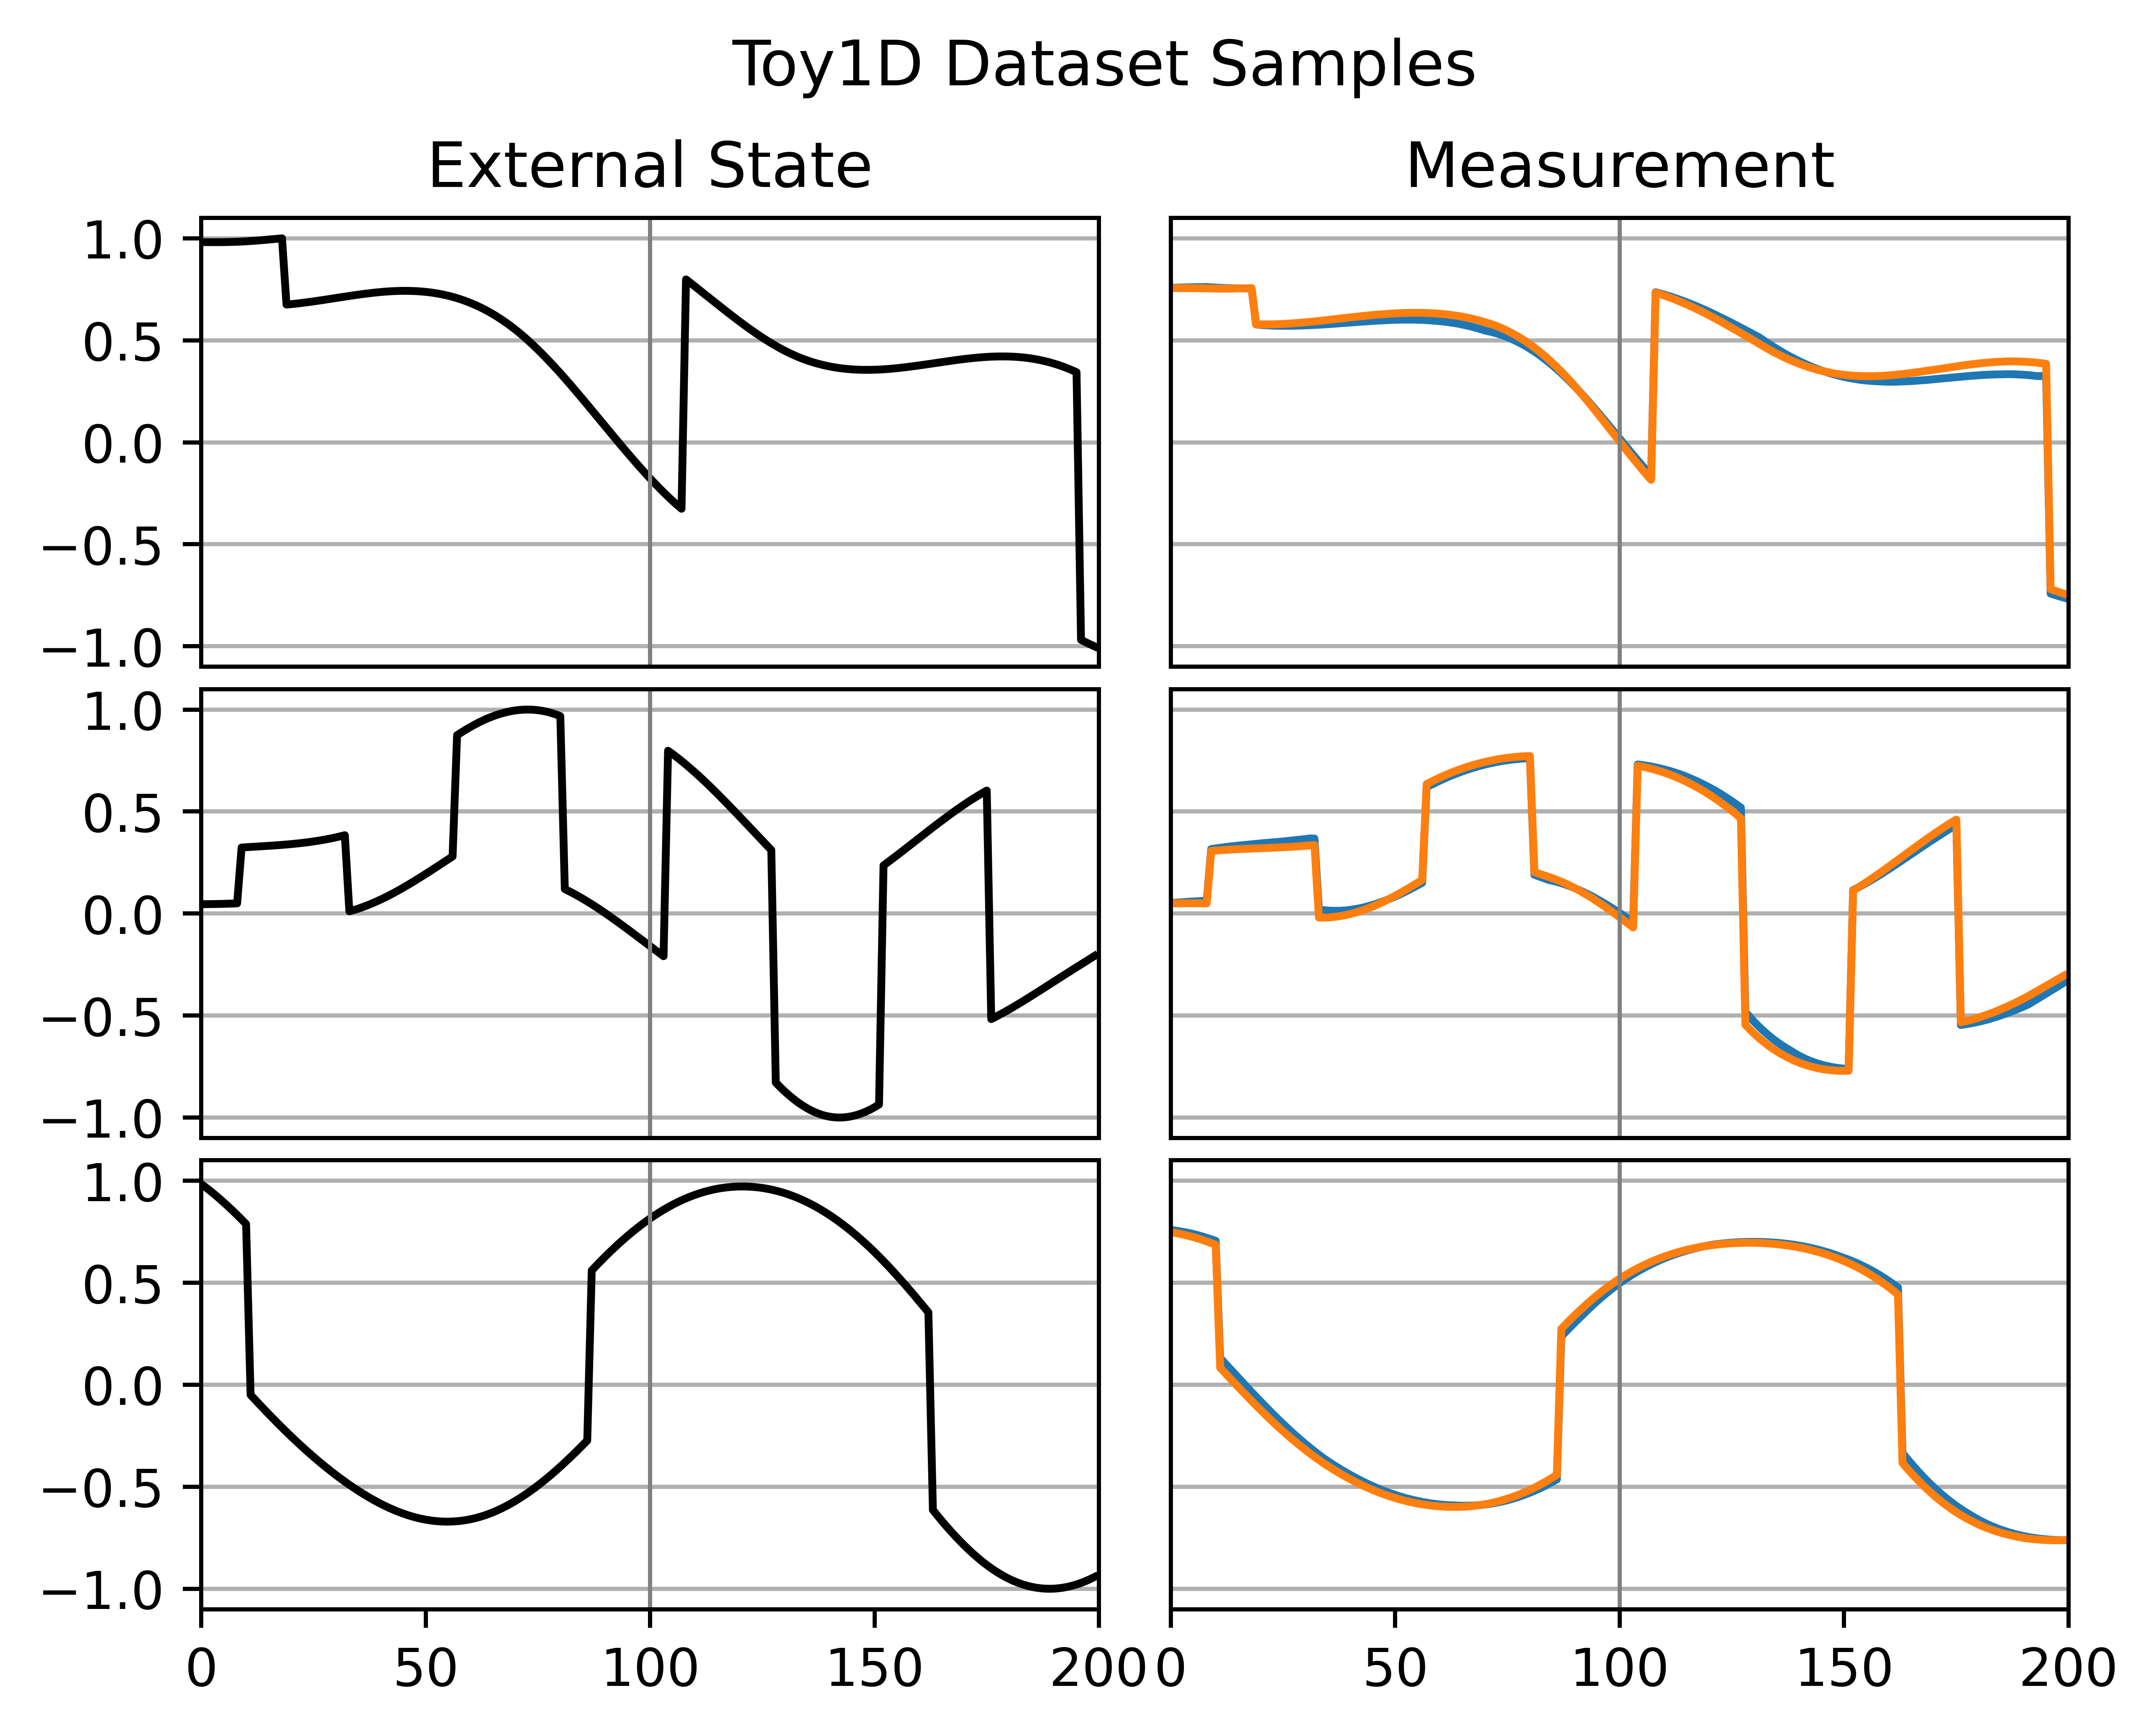

In [161]:
fig, axs = plt.subplots(3, 2, dpi=900)

axs:list[list[Axes]]

axs_flat : list[Axes] = axs.flatten()

for i in range(3):
    axs[i][0].plot(samples["targets"]["state_decoded"][i,:,0], color="black")

for i in range(3):
    axs[i][1].plot(samples["targets"]["measurement"][i])

for ax in axs_flat:
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 200)
    ax.set_yticks(np.arange(-1, 1+0.5, 0.5))
    ax.grid(True, "both", "y")

    ax.vlines(100, -1.1, 1.1, color="gray", linewidth=0.8)


for i in range(3):
    axs[i][1].set_yticklabels([])
    axs[i][1].tick_params(axis='y', length=0)

for i in range(2):
    axs[i][0].set_xticks([])
    axs[i][1].set_xticks([])

axs[0][0].set_title("External State")
axs[0][1].set_title("Measurement")


fig.subplots_adjust(wspace=0.08, hspace=0.05) 

plt.suptitle("Toy1D Dataset Samples")
fig.savefig("RESULTS_PAPER\\toy1d.png", facecolor="white", transparent=False,  bbox_inches="tight")


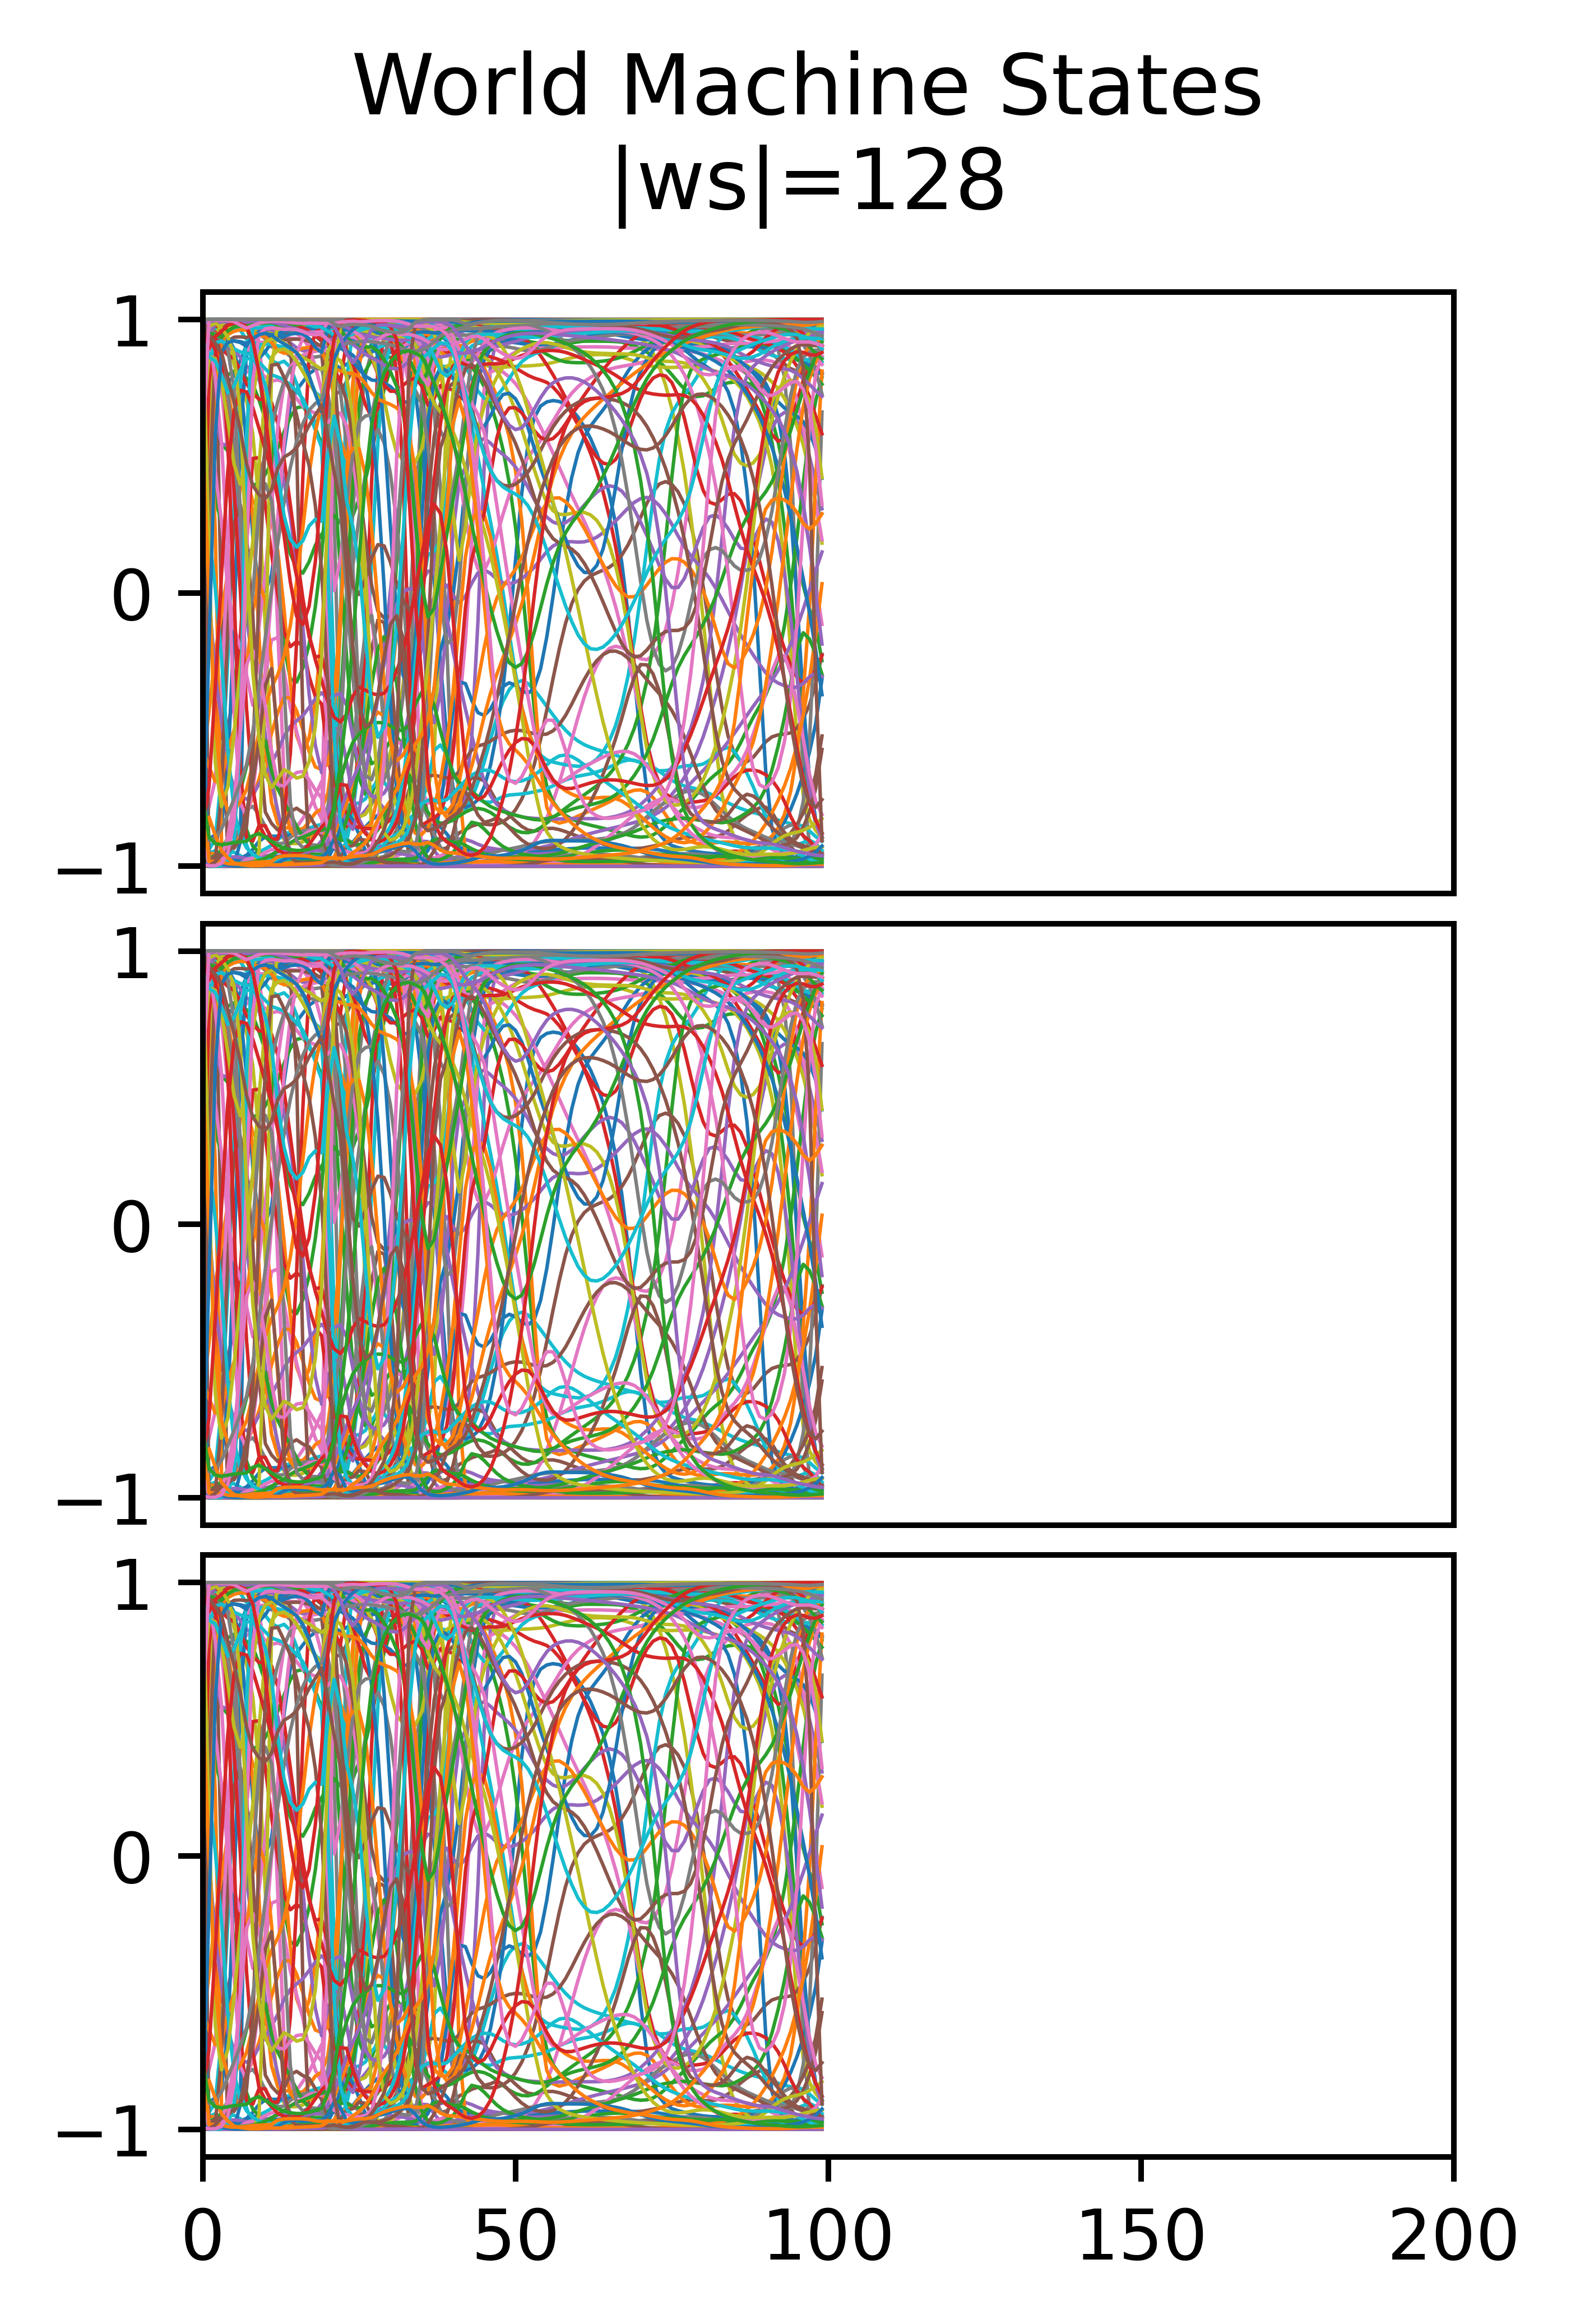

In [160]:
fig, axs = plt.subplots(3, 1, figsize= [6.4/2, 4.8], dpi=900)
axs:list[Axes]

for i in range(3):
    plt.sca(axs[i])
    plt.plot(samples["normal"]["state"][0, :100], linewidth=0.5)
    plt.xlim(0, 200)
    plt.ylim(-1.1, 1.1)

for i in range(2):
    axs[i].set_xticks([])

fig.subplots_adjust(hspace=0.05) 

plt.suptitle("World Machine States\n|ws|=128")
fig.savefig("RESULTS_PAPER\\world_machine_states.png", facecolor="white", transparent=False,  bbox_inches="tight")

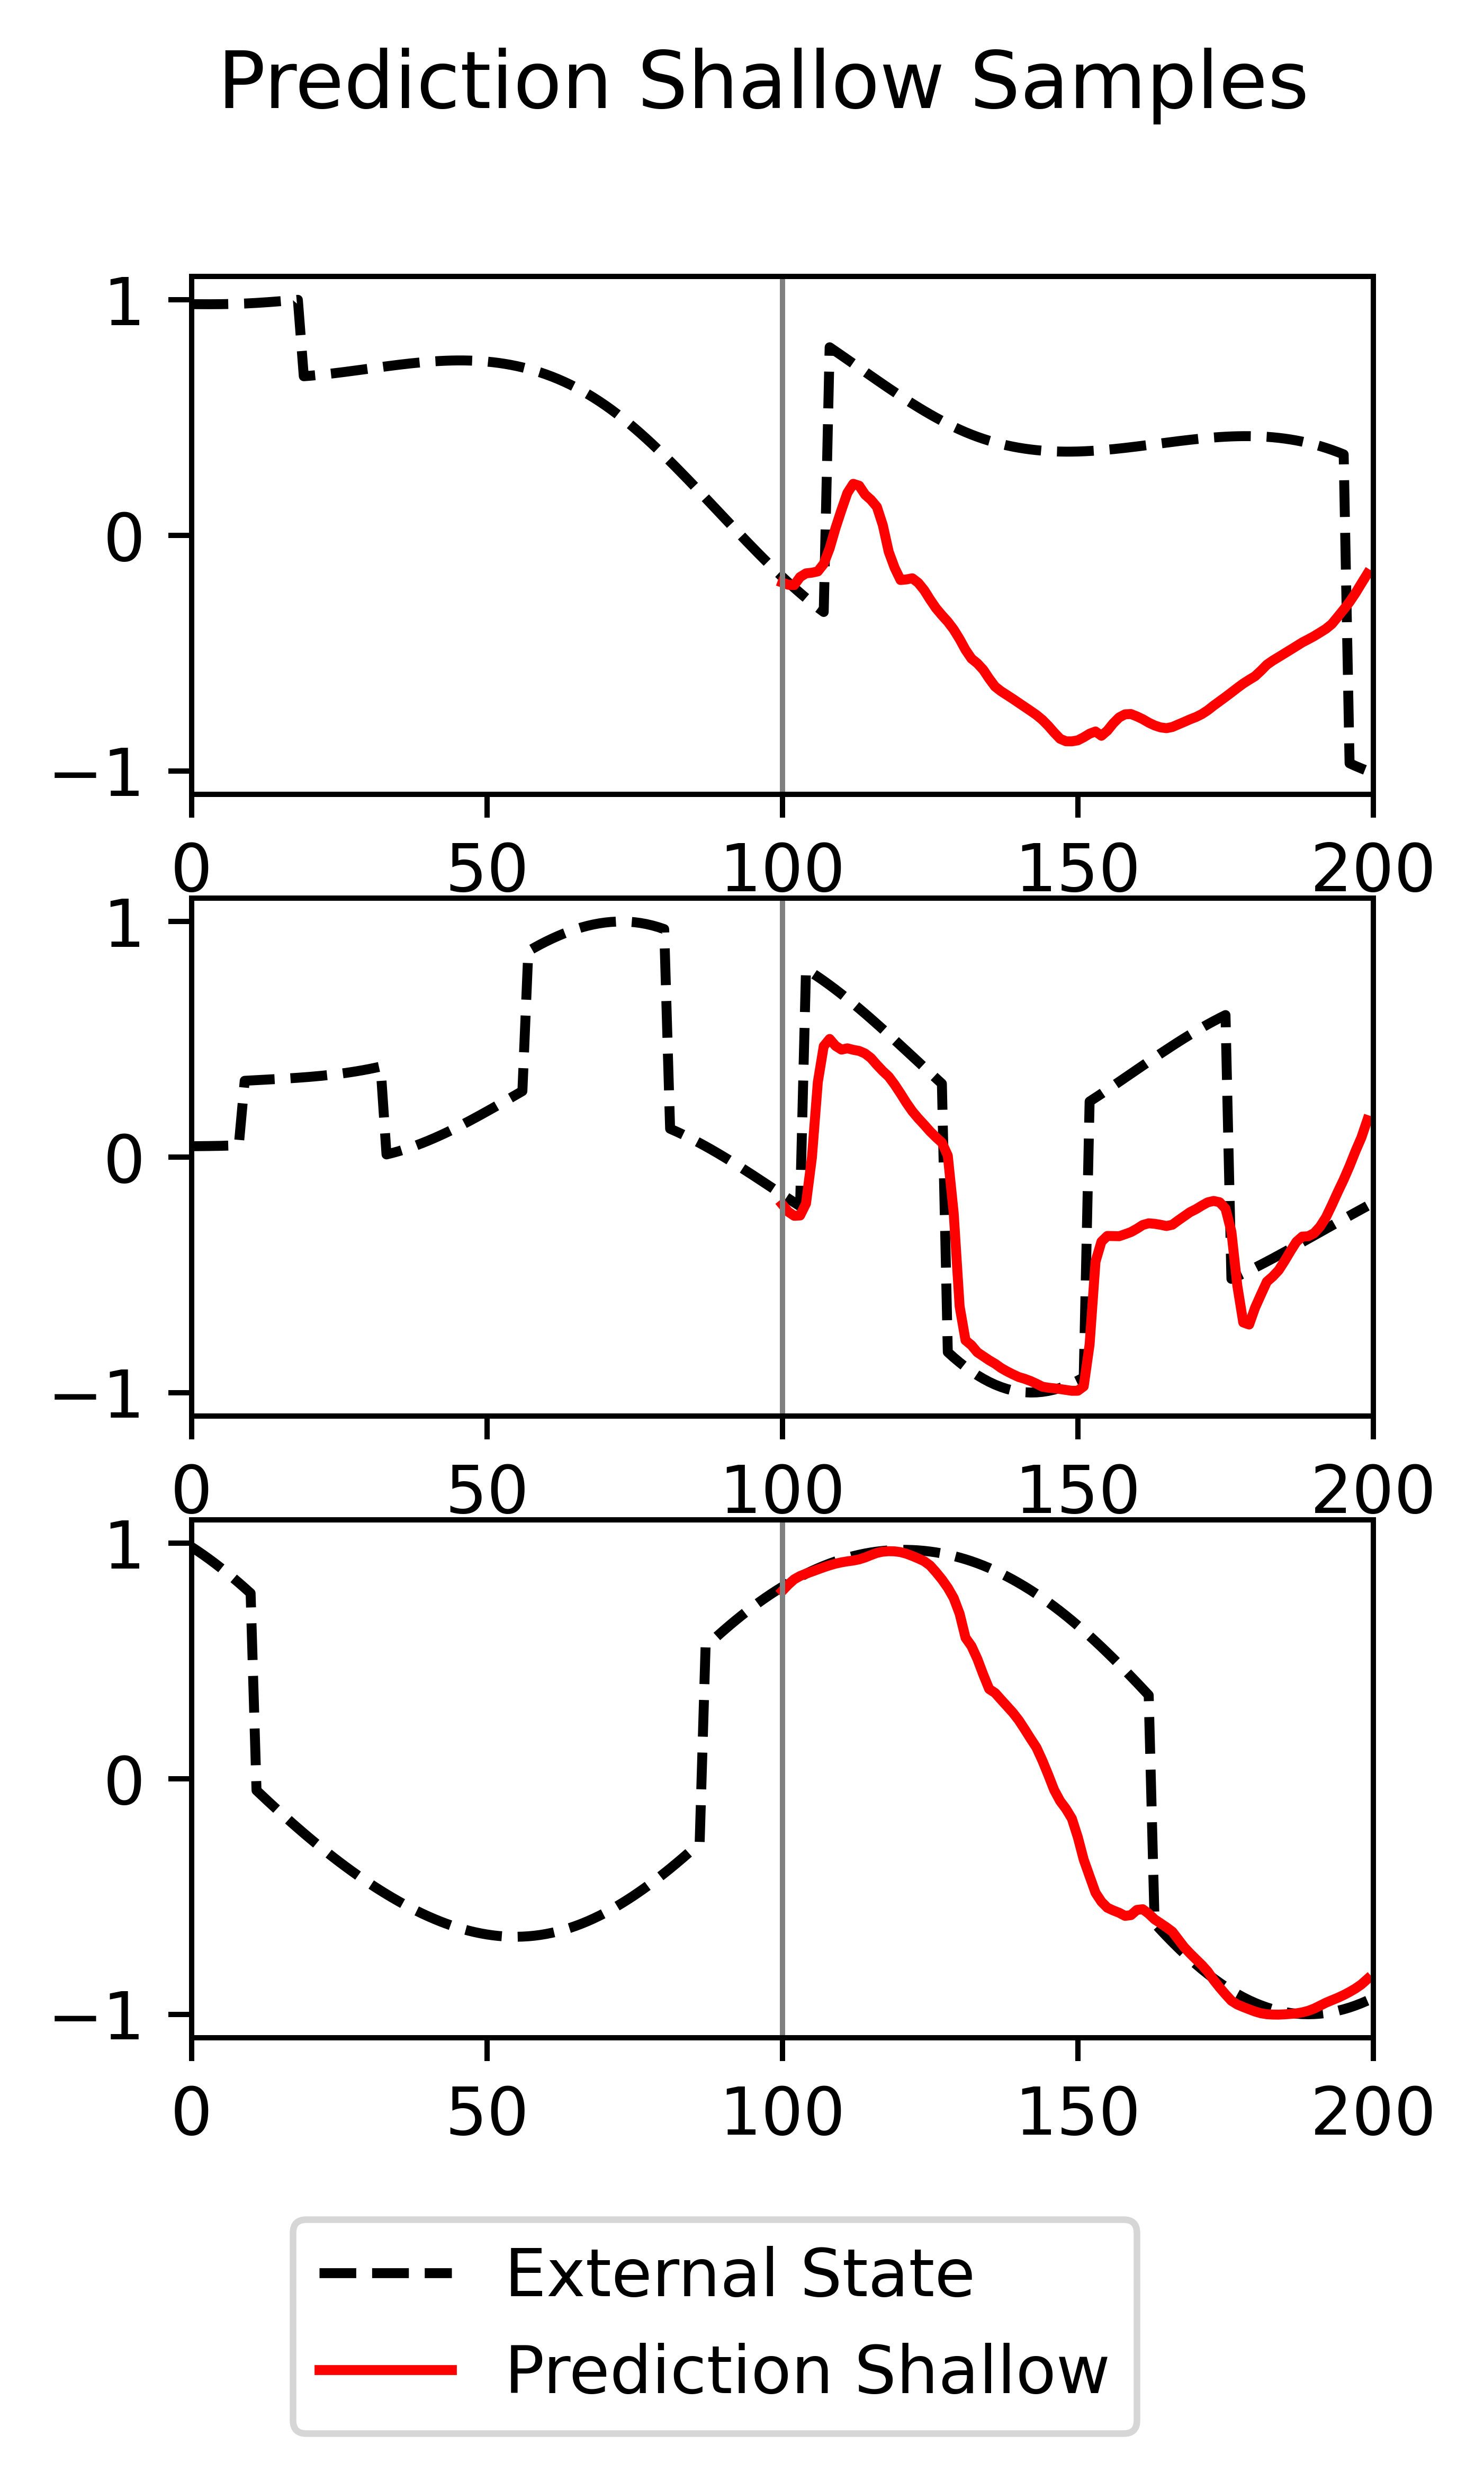

In [159]:
fig, axs = plt.subplots(3, 1, figsize= [6.4/2, 4.8], dpi=900)
axs:list[Axes]

for i in range(3):
    plt.sca(axs[i])
    
    plt.plot(samples["targets"]["state_decoded"][i,:,0], "--",color="black", label="External State")
    plt.plot(np.arange(100, 200), samples["prediction_shallow"]["state_decoded"][i, :, 0], color="red", label="Prediction Shallow")
    plt.xlim(0,200)
    plt.ylim(-1.1, 1.1)

    plt.vlines(100, -1.1, 1.1, color="gray", linewidth=0.80)


plt.suptitle("Prediction Shallow Samples")

axs[0].legend(bbox_to_anchor=(0.8, -2.75), borderaxespad=0)

fig.savefig("RESULTS_PAPER\\prediction_shallow_samples.png", facecolor="white", transparent=False,  bbox_inches="tight")